In [1]:
import re
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [2]:
#读取user_pay_count
user_pay_count_df = pd.read_csv("./data/dataset/dataset/user_pay_count.txt", sep='\t', encoding='UTF-8',parse_dates=True)
user_pay_count_df.index = user_pay_count_df['shop_id'];
user_pay_count_df=user_pay_count_df.drop('shop_id',axis=1);
temp = user_pay_count_df.columns[user_pay_count_df.columns != 'shop_id'];
temp = temp.map(lambda str_date:datetime.datetime.strptime(str_date, "%Y-%m-%d %H:%M:%S"))
user_pay_count_df.columns = temp


In [101]:
user_pay_count_df

,2015-06-25 00:00:00,2015-06-25 01:00:00,2015-06-25 02:00:00,2015-06-25 03:00:00,2015-06-25 04:00:00,2015-06-25 05:00:00,2015-06-25 06:00:00,2015-06-25 07:00:00,2015-06-25 08:00:00,2015-06-25 09:00:00,...,2016-10-31 15:00:00,2016-10-31 16:00:00,2016-10-31 17:00:00,2016-10-31 18:00:00,2016-10-31 19:00:00,2016-10-31 20:00:00,2016-10-31 21:00:00,2016-10-31 22:00:00,2016-10-31 23:00:00,2016-11-01 00:00:00
shop_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,9,4,13,17,27,22,11,5,1,0
2,0,0,0,0,0,0,0,0,0,0,...,3,5,15,5,13,11,4,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,6,5,9,9,8,5,4,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,5,14,9,17,17,20,3,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,27,16,24,26,15,35,26,10,0,0
6,0,0,0,0,0,0,0,0,0,0,...,13,17,20,6,2,3,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,4,3,6,7,6,10,3,0,0
8,0,0,0,0,0,0,0,0,0,0,...,2,3,1,2,6,4,2,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,10,13,32,43,32,26,1,0,0,0


In [3]:
shop_open_date = pd.read_csv("./data/dataset/dataset/shop_open_date_index.txt", sep='\t', index_col=0, header=None, encoding='UTF-8',parse_dates=[1])


In [4]:
###shop_info表处理
shop_infos = pd.read_csv("./data/dataset/dataset/shop_info.txt",
                         encoding='UTF-8',header=None,
                        names=['id','city','loc','per_pay','score',
                               'comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'])

#dtype={'id':np.int,'city':np.str,'loc':np.int,'per_pay':np.int,'score':np.int,
#                               'comment_cnt':np.int,'shop_level':np.int,'cate_1_name':np.str,'cate_2_name':np.str,'cate_3_name':np.str}

##经查看，只有cate_1_name 是超市便利店的项 cate_3_name 为NULL score为NULL comment_cnt 为NULL 且shop_level <= 1

In [8]:
def getShopPayTimeSeries(shop_id, date_range):
     return user_pay_count_df.ix[shop_id][date_range[0]:date_range[1]]

In [85]:
def getShopPayTimePeriods(shop_id, date_range, time_range):
    ts = getShopPayTimeSeries(shop_id, date_range)
    period_start = pd.date_range(start=date_range[0], end=date_range[1],freq='D')
    period_end = pd.date_range(start=date_range[0], end=date_range[1],freq='D')
    period_start = period_start + time_range[0];
    period_end = period_end + time_range[1];
    #range(len(period_start))
    #period_start[i]:period_end[i]
    
    periods = None
    for i in range(len(period_start)):
        if i == 0: 
            periods = ts[period_start[i]:period_end[i]]
        else:
            print('%d a'%(i))
            periods = periods.append(ts[period_start[i]:period_end[i]])
            print(periods)
    return periods;

In [99]:
def countShopPayTimePeriods(shop_id, date_range, time_range):
    ts = getShopPayTimeSeries(shop_id, date_range)
    period_start = pd.date_range(start=date_range[0], end=date_range[1],freq='D')
    period_end = pd.date_range(start=date_range[0], end=date_range[1],freq='D')
    period_start = period_start + time_range[0];
    period_end = period_end + time_range[1];
    #range(len(period_start))
    #period_start[i]:period_end[i]
    
    periods = pd.Series();
    for i in range(len(period_start)):
        count = ts[period_start[i]:period_end[i]].sum()
        periods[period_start[i]] = count;
        print('%s %d a'%(period_start[i], count))
    return periods;

2016-03-30 00:00:00
2016-03-30 10:00:00 3 a
2016-03-31 10:00:00 4 a
2016-04-01 10:00:00 13 a
2016-04-02 10:00:00 24 a
2016-04-03 10:00:00 25 a
2016-04-04 10:00:00 9 a
2016-04-05 10:00:00 14 a
2016-04-06 10:00:00 0 a


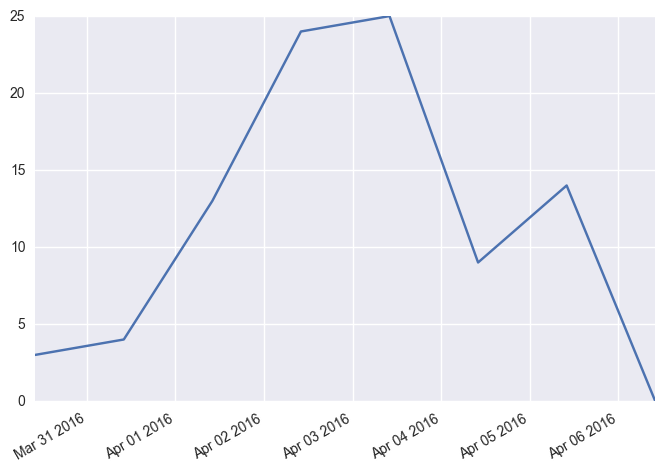

In [100]:
id = 13
open_time = shop_open_date.loc[id][1];
print(open_time)
start_time = open_time;
end_time = open_time + datetime.timedelta(7)
s = countShopPayTimePeriods(id, date_range=[start_time, end_time], time_range=[datetime.timedelta(hours=10), datetime.timedelta(hours=15)])
s.plot()
plt.show()

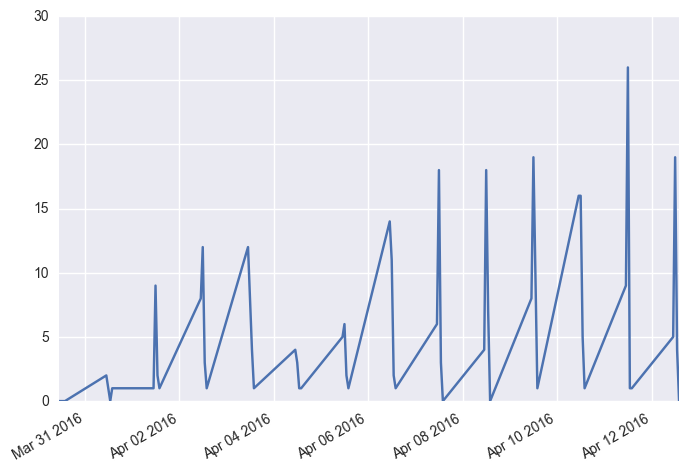

In [92]:
shop_infos[shop_infos["id"] == id]

,id,city,loc,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
12,13,杭州,286,6,0.0,2.0,0,美食,快餐,中式快餐


,id,city,loc,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
999,1000,广州,552,20,1.0,4.0,2,美食,中餐,川菜


In [37]:
shop_infos[shop_infos['cate_1_name'] == '美食']

,id,city,loc,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
0,1,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点
2,3,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶
4,5,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果
5,6,大连,1139,13,3.0,1.0,0,美食,烘焙糕点,面包
6,7,绍兴,145,13,3.0,9.0,2,美食,快餐,西式快餐
7,8,杭州,234,16,3.0,1.0,0,美食,休闲食品,生鲜水果
10,11,上海,134,12,3.0,1.0,0,美食,小吃,其它小吃
11,12,宁波,786,20,1.0,2.0,0,美食,中餐,东北菜
12,13,杭州,286,6,0.0,2.0,0,美食,快餐,中式快餐
13,14,深圳,862,7,1.0,4.0,2,美食,快餐,中式快餐


In [44]:
shop_infos["city"].value_counts().shape

(122,)

In [ ]:
def getShopPayCompareWeekSeries(shop_id)

In [ ]:
def getShopOpenTime(shop_id)
    return shop_open_time_index[shop_id]

In [ ]:
xx = user_pay_count_df.ix[0][shop_open_time_index[0]:-2]

In [55]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ...:                           'foo', 'bar', 'foo', 'foo'],
   ...:                    'B' : ['one', 'one', 'two', 'three',
   ...:                           'two', 'two', 'one', 'three'],
   ...:                    'C' : np.random.randn(8),
   ...:                    'D' : np.random.randn(8)})
   ...: 
df    

,A,B,C,D
0,foo,one,1.735144,-1.197421
1,bar,one,0.175496,-0.114906
2,foo,two,-0.862648,0.794884
3,bar,three,1.190529,0.970122
4,foo,two,-0.559558,1.946485
5,bar,two,-1.481934,0.772928
6,foo,one,-1.619828,0.163805
7,foo,three,0.534757,1.396147


In [58]:
grouped = df.groupby(['A','B'])

In [60]:
tt = grouped.count()
print(type(tt))

<class 'pandas.core.frame.DataFrame'>


In [61]:
tt.shape

(6, 2)

In [64]:
tt

C  D
A   B          
bar one    1  1
    three  1  1
    two    1  1
foo one    2  2
    three  1  1
    two    2  2

In [63]:
tt.index

MultiIndex(levels=[['bar', 'foo'], ['one', 'three', 'two']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=['A', 'B'])

In [28]:
temp = pd.DataFrame({'A':np.random.randn(6),'B':np.random.randn(6)})

In [29]:
temp

,A,B
0,0.097416,-0.316047
1,0.218596,0.417785
2,-1.634502,-1.157116
3,1.264128,0.256154
4,1.215305,-1.141858
5,-0.003144,-1.267498


In [34]:
temp.loc[0,'A'] = 1

In [35]:
temp

,A,B,"(0, A)"
0,1.000000,-0.316047,1
1,0.218596,0.417785,1
2,-1.634502,-1.157116,1
3,1.264128,0.256154,1
4,1.215305,-1.141858,1
5,-0.003144,-1.267498,1


In [ ]:
m = user_pays.shape[0]
for t in range(m):
    


In [ ]:
user_pays.to_csv()

In [3]:
user_pays['shop_id'].value_counts()

1629    680464
58      476209
1928    418208
517     380184
1821    287665
731     261765
934     252281
1296    224266
1302    220913
1745    219332
1350    218094
1535    211497
1469    195769
891     188615
580     187176
650     176365
1875    176143
679     174151
114     170423
854     169266
897     168111
1687    167316
577     165387
88      163534
1346    162321
146     158867
338     156907
900     156104
1123    154943
1624    153897
         ...  
1063      5779
1949      5778
1953      5771
1336      5756
18        5716
1908      5693
218       5671
33        5664
400       5649
201       5644
793       5632
1715      5584
10        5583
434       5496
1046      5448
809       5441
1808      5422
1816      5317
222       5288
561       5272
842       5163
633       5129
1384      5022
735       5015
461       4982
75        4911
308       4778
45        4727
706       4495
1010      4321
Name: shop_id, dtype: int64